We test the output of the task_fft routine for the first 10_000 data points in the L0101 channel

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import adios2

from scipy.signal import spectrogram

Load data that is written out after Fourier transforming the first 10_000 data

In [2]:
# This is the result of the futures returned by task_fft.do_fft after the first time-step (s=0)

df = np.load("/global/homes/r/rkube/repos/delta/dask_fft_data_s0000.npz")
fft_data = df["fft_data"]
df.close()

In [7]:
fname_a2 = "/global/cscratch1/sd/rkube/KSTAR/kstar_streaming/018431/KSTAR.bp"
df = adios2.open(fname_a2, "r")
L0101_data = df.read("ECEI_L0101")
df.close()

In [9]:
# Make sure we have the correct parameters from the function call used in the processor
nfft = 1000
window="hann"
noverlap = 500

fft2 = spectrogram(L0101_data, nfft=nfft, window=window, nperseg=nfft, detrend="linear", noverlap=noverlap, scaling="spectrum", mode="complex", return_onesided=False)
fft2 = fft2[2]
fft2_mean = fft2.mean(axis=1)

In [13]:
fft_data[0,:10]

array([-0.61173745+0.j        ,  1.76268348+0.54491742j,
       -2.8870821 -0.27255344j, -0.87831714-2.21914393j,
        4.48045792+4.22121212j, -4.56337864-1.9890986j ,
        4.70976949+0.32106988j, -1.90442759-1.33503129j,
       -0.73813508+1.5430449j , -2.041131  +3.21291758j])

In [14]:
fft2_mean[:10]

array([-0.61173745+0.j        ,  1.76268348+0.54491742j,
       -2.8870821 -0.27255344j, -0.87831714-2.21914393j,
        4.48045792+4.22121212j, -4.56337864-1.9890986j ,
        4.70976949+0.32106988j, -1.90442759-1.33503129j,
       -0.73813508+1.5430449j , -2.041131  +3.21291758j])

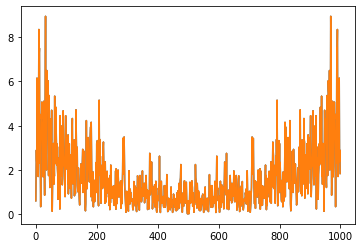

In [16]:
plt.plot(np.abs(fft_data[0,:]))
plt.plot(np.abs(fft2_mean))